conjunto de datos

### Contexto
Este conjunto de datos se crea únicamente con el fin de aprender los conceptos de segmentación de clientes, también conocido como análisis de la cesta de la compra. Demostraré esto utilizando la técnica de aprendizaje automático no supervisado (algoritmo de agrupación en clústeres de KMeans) en la forma más simple.

### Contenido
Usted es dueño de un supermercado y, a través de tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.
El puntaje de gasto es algo que usted asigna al cliente en función de sus parámetros definidos, como el comportamiento del cliente y los datos de compra.

### Declaración del problema
Usted es dueño del centro comercial y desea comprender a los clientes, quienes pueden converger fácilmente [Clientes objetivo] para poder darle sentido al equipo de marketing y planificar la estrategia en consecuencia.


Ubicación: Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [236]:
# @title Conexión con la base de datos desde una URL
# URL: https://drive.google.com/file/d/1B4ickpoVCJdChfH1EmgKvhufZhmIezZc/view?usp=sharing
# Definir el ID del archivo de Google Drive
FILEID = '1B4ickpoVCJdChfH1EmgKvhufZhmIezZc'
nombre_archivo = 'Mall_Customers.csv'

# Descargar el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2024-10-13 05:34:07--  https://docs.google.com/uc?export=download&confirm=&id=1B4ickpoVCJdChfH1EmgKvhufZhmIezZc
Resolving docs.google.com (docs.google.com)... 108.177.121.113, 108.177.121.138, 108.177.121.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.121.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1B4ickpoVCJdChfH1EmgKvhufZhmIezZc&export=download [following]
--2024-10-13 05:34:07--  https://drive.usercontent.google.com/download?id=1B4ickpoVCJdChfH1EmgKvhufZhmIezZc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [application/octet-stream]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K 

## Instalar librerias

In [237]:
!pip install PyQt5

## Importing the libraries

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Funciones relacionadas con modelo
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline  # Asegura que los gráficos aparezcan en el notebook
import plotly.express as px
import plotly.graph_objects as go


In [239]:
#  Carga de la base de datos con libreria de Pandas
dataset = pd.read_csv('Mall_Customers.csv') # formato .csv

In [240]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [241]:
# Composición de la base de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<ipython-input-242-4fa6c8900ba8>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




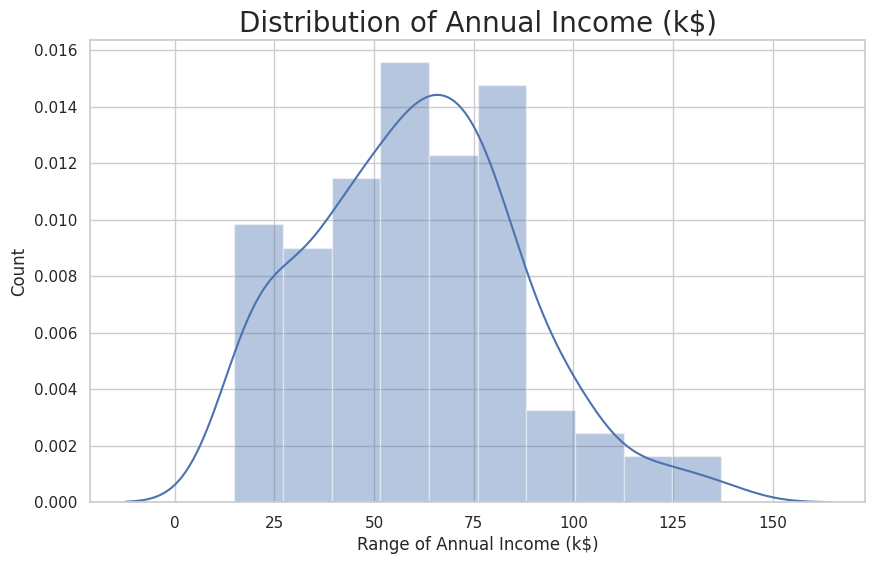

In [242]:
# Annual Income Distribution:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

<ipython-input-243-a04504f50b42>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




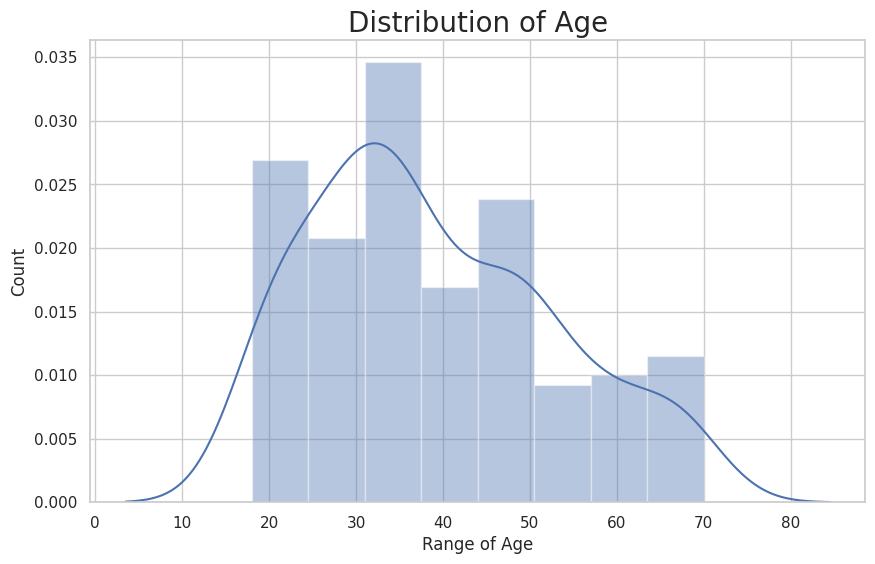

In [243]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

<ipython-input-244-a8015a6c4f8e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Count')

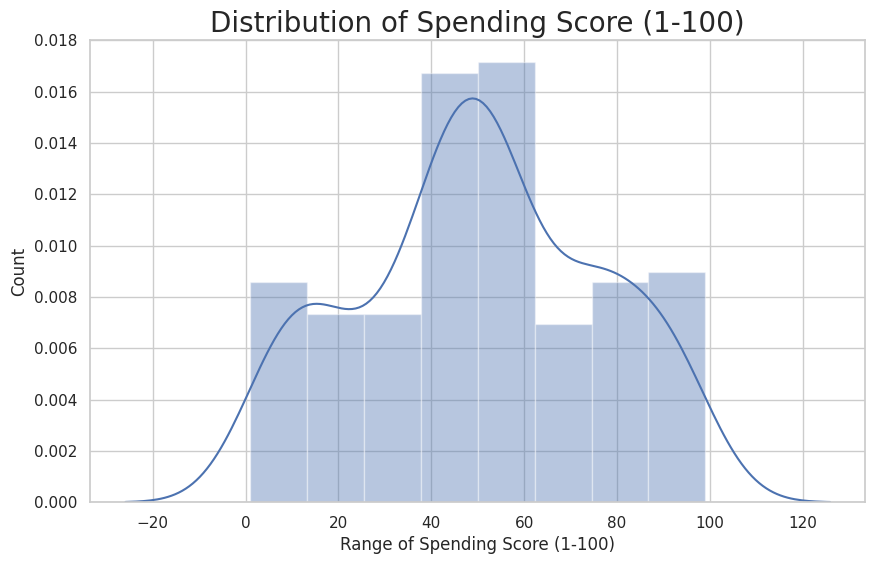

In [244]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

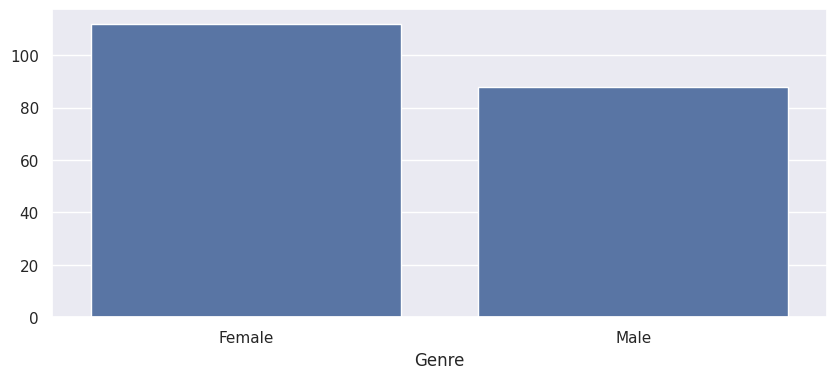

In [245]:
genders = dataset.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# K-Means Clustering

### **K-means: Modelo de Aprendizaje No Supervisado**

**K-means** es un algoritmo de *aprendizaje no supervisado* utilizado para **agrupamiento (clustering)**. Su objetivo es dividir un conjunto de datos en **k grupos** o **clusters**, donde cada grupo contiene puntos de datos similares entre sí. No requiere etiquetas de clase, sino que detecta patrones o estructuras en los datos para formar las agrupaciones.

---

### **¿Cómo funciona el algoritmo?**
1. **Definir el número de clusters (k):**
   - El usuario elige el número de grupos en los que quiere dividir los datos.

2. **Inicialización:**
   - Se seleccionan aleatoriamente **k centroides** (uno para cada cluster). Estos centroides son puntos en el espacio que actúan como los centros de los clusters.

3. **Asignación de puntos a clusters:**
   - Cada punto de datos se asigna al **cluster cuyo centroide esté más cercano** (usando la distancia Euclidiana).

4. **Recalcular los centroides:**
   - Una vez que todos los puntos han sido asignados, se recalcula el centroide para cada cluster, tomando el promedio de los puntos que le pertenecen.

5. **Repetir los pasos 3 y 4:**
   - La asignación y la actualización de centroides se repiten hasta que no haya cambios significativos o hasta que se alcance un número máximo de iteraciones.

---

### **Ejemplo Visual:**
- Si tienes puntos de datos dispersos (por ejemplo, ubicaciones de clientes) y eliges \(k = 3\), el algoritmo encontrará 3 centros y agrupará los datos cercanos a cada uno de ellos.

---

### **Aplicaciones de K-means:**
- **Segmentación de clientes** en marketing.
- **Agrupación de imágenes** o reducción de colores.
- **Detección de patrones** en datos sin etiquetar.
- **Análisis de datos biológicos**, como agrupamiento de genes o especies.

---

### **Ventajas y Desventajas:**

**Ventajas:**  
- Simple y rápido para datos pequeños.  
- Fácil de implementar y entender.  

**Desventajas:**  
- El número de clusters \(k\) debe elegirse manualmente.  
- No siempre encuentra el mejor agrupamiento si los datos tienen formas complejas.  
- Sensible a valores atípicos y a la inicialización de los centroides.



## Importing the dataset

In [246]:
df1 = dataset[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X = df1[["Annual Income (k$)","Spending Score (1-100)"]]
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [247]:
# Selección de 2 columnas - Año y mes
X = dataset.iloc[:, [3, 4]].values

In [248]:
X.shape

(200, 2)

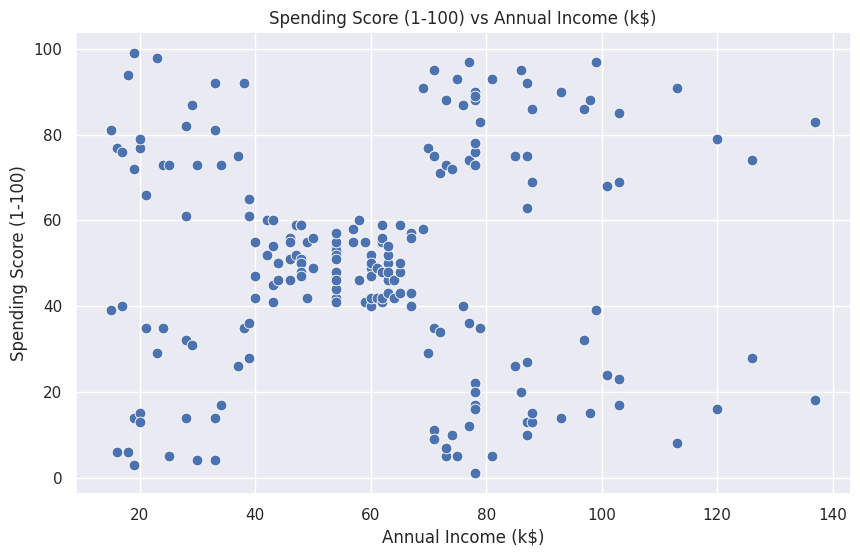

In [249]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',  data = dataset, s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Using the elbow method to find the optimal number of clusters

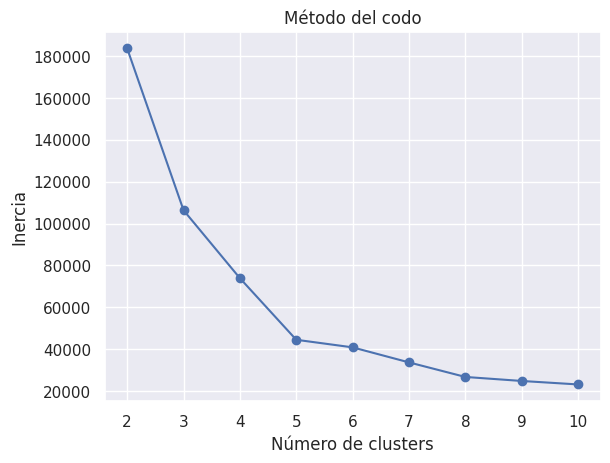

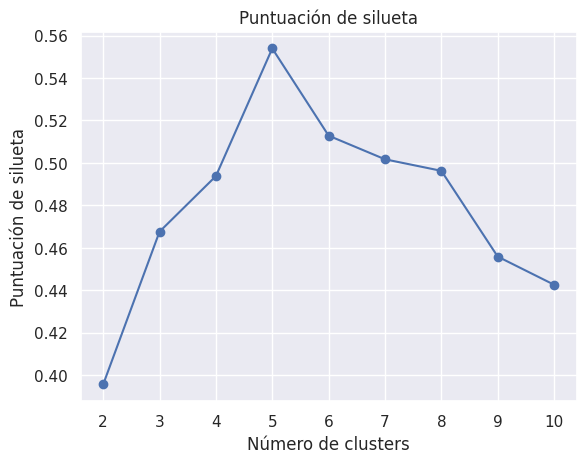

In [250]:
# Estimación de agrupaciones con modelos no supervisados
inertia = []
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if i > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg.append(silhouette_score(X, kmeans.labels_))

# Gráfica de la Inercia
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Gráfica de la puntuación de silueta
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Puntuación de silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de silueta')
plt.show()

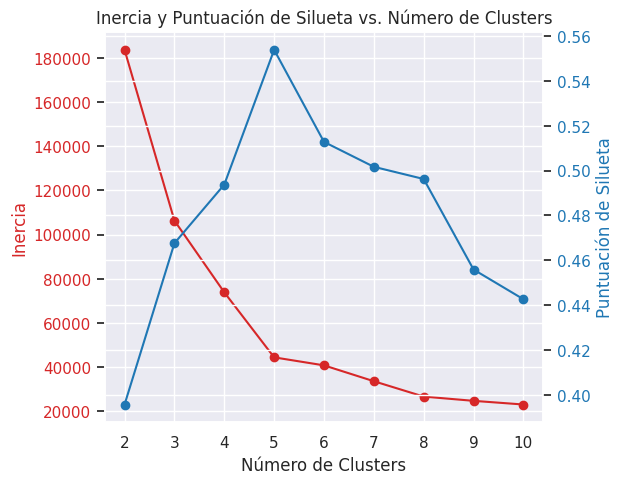

In [251]:
# Número de agrupaciones
num_clusters = range(2, 11)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfica de la Inercia (eje Y derecho)
color = 'tab:red'
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(num_clusters, inertia, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y (izquierdo) para la puntuación de silueta
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Puntuación de Silueta', color=color)
ax2.plot(num_clusters, silhouette_avg, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar el diseño de la gráfica
fig.tight_layout()
plt.title('Inercia y Puntuación de Silueta vs. Número de Clusters')
plt.show()

## Training the K-Means model on the dataset

In [252]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

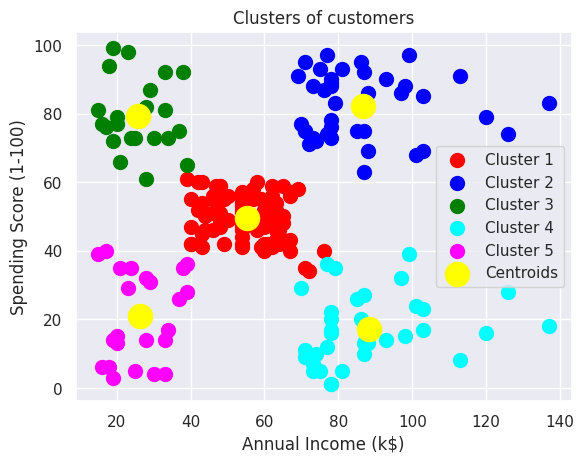

In [253]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [254]:
df1["label"] = y_kmeans
#The data with labels
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


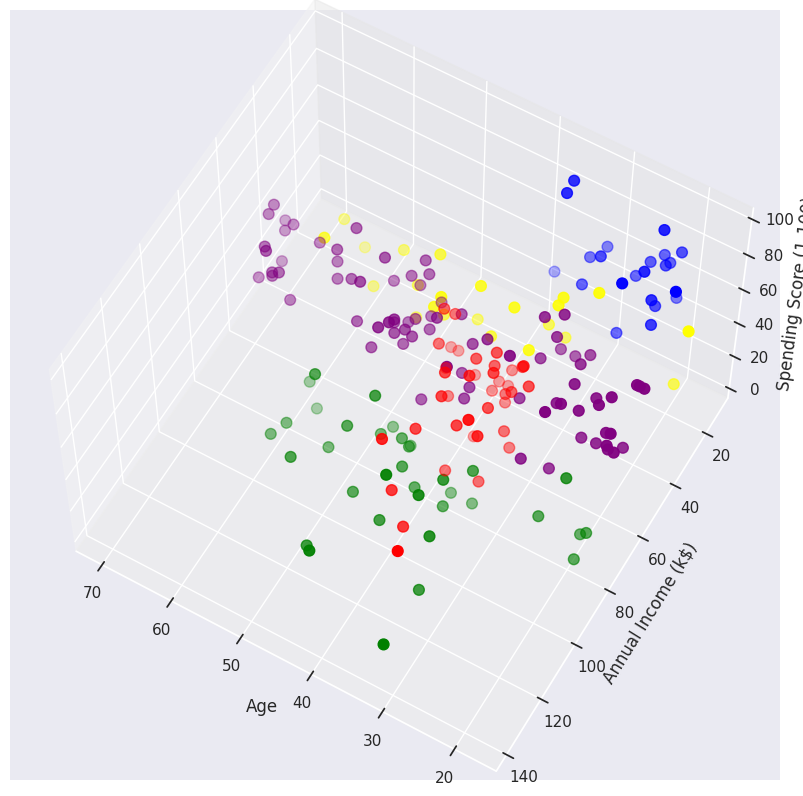

In [255]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(60, 120)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [256]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(dataset[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

# Convertir X a DataFrame para facilitar el manejo
df1 = pd.DataFrame(dataset, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df1['label'] = labels


In [257]:
fig = px.scatter_3d(df1, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='label', title='3D Interactive Scatter Plot')
# fig.show()

# Extraer las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Añadir los centroides como una nueva traza
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=20, color='black', symbol='diamond', opacity=0.9),
        name='Centroids'
    )
)

# Mostrar la gráfica interactiva
fig.show()

### **¿Qué es el Clustering Jerárquico?**  
El **Clustering Jerárquico** es un método de **agrupamiento (clustering)** que construye una jerarquía de grupos de datos. A diferencia de otros algoritmos como **K-means**, este tipo de clustering no requiere definir el número de clusters desde el principio. La estructura resultante se representa con un **dendrograma**, que muestra cómo los puntos de datos se agrupan en diferentes niveles.

---

### **Tipos de Clustering Jerárquico**
1. **Aglomerativo (Ascendente):**  
   - Comienza tratando cada punto como un cluster independiente.  
   - En cada paso, los clusters más cercanos se fusionan hasta que todos los puntos pertenecen a un solo cluster.  
   - **Es el enfoque más común.**

2. **Divisivo (Descendente):**  
   - Comienza con todos los puntos en un único cluster.  
   - En cada paso, un cluster se divide hasta que cada punto es su propio cluster.  
   - **Es menos utilizado debido a su complejidad computacional.**

---

### **Funcionamiento del Clustering Aglomerativo (Ascendente)**

1. **Medir las distancias entre los puntos de datos.**  
   La distancia más comúnmente usada es la **distancia euclidiana**, aunque también se pueden usar otras métricas (como Manhattan o coseno).

2. **Crear un cluster para cada punto individual.**  
   Inicialmente, cada punto es tratado como un cluster separado.

3. **Fusionar los clusters más cercanos.**  
   Los dos clusters más cercanos se fusionan en uno solo. La distancia entre clusters se puede medir de diferentes formas:
   - **Single linkage**: La distancia mínima entre dos puntos de clusters diferentes.
   - **Complete linkage**: La distancia máxima entre dos puntos de clusters diferentes.
   - **Average linkage**: El promedio de las distancias entre todos los puntos de dos clusters.
   - **Ward**: Minimiza la varianza dentro de los clusters (la opción más utilizada).

4. **Repetir el proceso hasta obtener un único cluster.**  
   El proceso continúa hasta que todos los puntos pertenecen al mismo cluster.

---

### **Visualización con un Dendrograma**
Un **dendrograma** es una representación gráfica que muestra la secuencia de fusiones de clusters. En este gráfico:  
- El **eje X** muestra los puntos de datos o clusters.
- El **eje Y** indica la distancia a la que se fusionaron los clusters.

Cada nivel del dendrograma representa una posible partición de los datos en clusters. El usuario puede **cortar** el dendrograma a un nivel específico para obtener un número deseado de clusters.

---

### **Ventajas y Desventajas**

#### **Ventajas:**
- No se necesita definir el número de clusters desde el inicio.
- Puede encontrar estructuras jerárquicas en los datos.
- Es útil para problemas donde se requiere interpretar niveles de similitud.

#### **Desventajas:**
- **Costoso en términos computacionales** para datasets grandes (el tiempo de ejecución es \(O(n^2)\)).
- **Sensible a los valores atípicos**.
- Una vez que un punto o cluster ha sido asignado, no se puede deshacer la asignación (sin reentrenar desde cero).

---

### **Aplicaciones del Clustering Jerárquico**
- **Biología**: Clasificación de especies y genes según su similitud.
- **Marketing**: Segmentación de clientes en función de comportamientos.
- **Análisis de textos**: Agrupación de documentos o palabras con significados similares.
- **Detección de anomalías**: Identificación de comportamientos anormales en datos.

---

### **Conclusión**
El **Clustering Jerárquico** es una técnica potente para encontrar patrones y estructuras jerárquicas en los datos. Aunque su costo computacional es alto, es muy útil para análisis exploratorio, especialmente en datasets pequeños o medianos.

# Hierarchical Clustering

In [258]:
def calculate_inertia(X, labels):
    inertia = 0
    # Iterar sobre cada cluster identificado
    for i in np.unique(labels):
        # Seleccionar los puntos pertenecientes al cluster actual
        cluster_points = X[labels == i]
        # Calcular el centroide del cluster
        centroid = cluster_points.mean(axis=0)
        # Sumar la distancia cuadrada de cada punto al centroide
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

## Importing the dataset

In [259]:
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

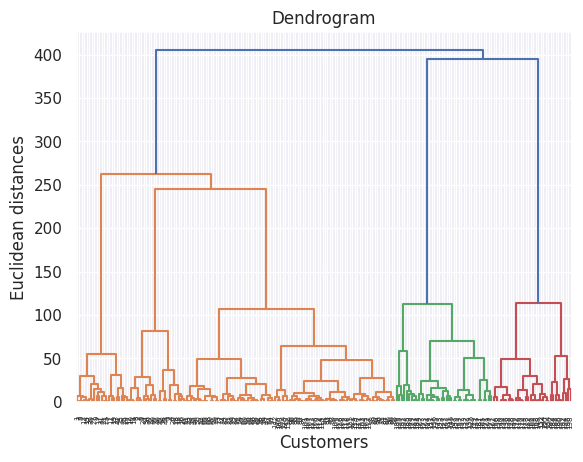

In [260]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [261]:
inertia = []
silhouette_avg = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X)
  inertia.append(calculate_inertia(X, y_hc))
  silhouette_avg.append(silhouette_score(X, y_hc))

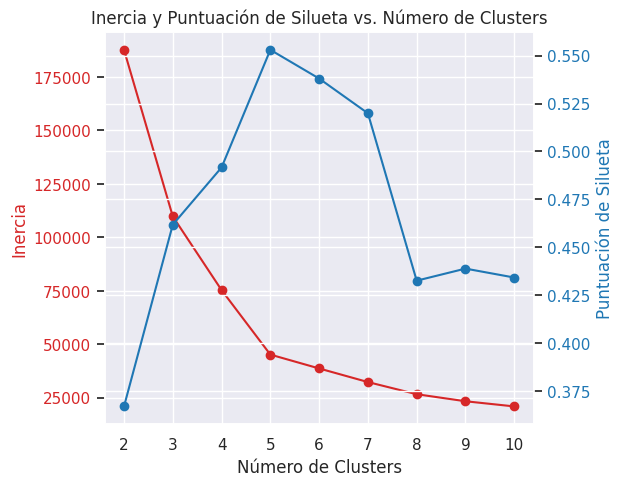

In [262]:
# Número de agrupaciones
num_clusters = range(2, 11)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfica de la Inercia (eje Y derecho)
color = 'tab:red'
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(num_clusters, inertia, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y (izquierdo) para la puntuación de silueta
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Puntuación de Silueta', color=color)
ax2.plot(num_clusters, silhouette_avg, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar el diseño de la gráfica
fig.tight_layout()
plt.title('Inercia y Puntuación de Silueta vs. Número de Clusters')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [263]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

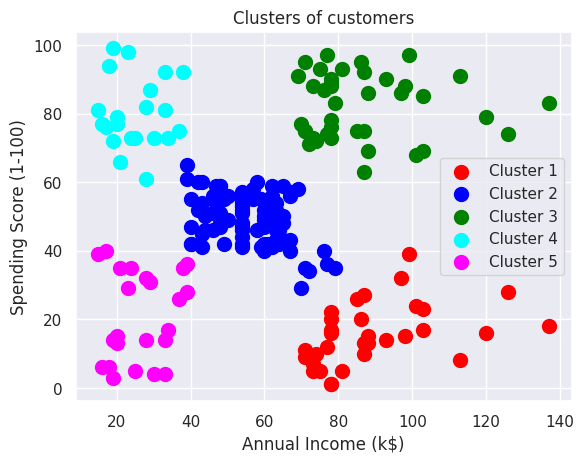

In [264]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

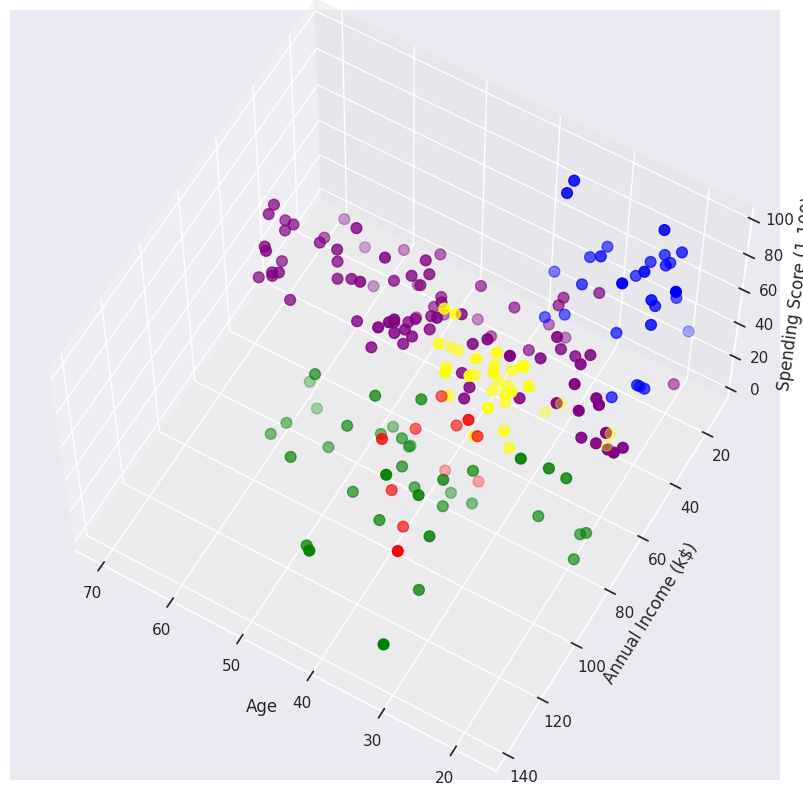

In [265]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(60, 120)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [266]:
df = dataset[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df['Cluster'] = labels

# Aproximar los centroides calculando el promedio por cluster
centroids = df.groupby('Cluster').mean().values

# Mostrar los centroides aproximados
print("Centroides aproximados:")
print(centroids)

Centroides aproximados:
[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]


<ipython-input-266-093c77a47101>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [268]:
import plotly.express as px
import plotly.graph_objects as go

# Crear la gráfica 3D con Plotly Express
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')

# Agregar los centroides como nueva traza
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=20, color='black', symbol='diamond', opacity=0.8),
        name='Centroids'
    )
)

# Mostrar la gráfica interactiva
fig.show()